Q1. What is the relationship between polynomial functions and kernel functions in machine learning
algorithms?

In machine learning, kernel functions play a crucial role in Support Vector Machines (SVMs), both in classification (SVC) and regression (SVR) tasks. Polynomial functions are a type of kernel function used in SVMs.

Kernel Functions:
Kernel functions are used to transform input data into a higher-dimensional space, making it possible to find a hyperplane that separates the data in a way that maximizes the margin between different classes or fits the regression problem well. They allow SVMs to operate in a high-dimensional space without explicitly calculating the transformed feature vectors.

Polynomial Kernel Function:

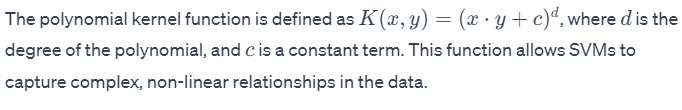

Relationship:
Polynomial functions are a specific type of kernel function used in SVMs. When you choose the polynomial kernel for an SVM, you are essentially using a polynomial function as the similarity measure between data points. The degree of the polynomial (
�
d) is a hyperparameter that determines the complexity of the decision boundary.

In summary, polynomial functions are a specific instance of kernel functions, and the polynomial kernel is one option among several for shaping the decision boundary in SVMs.

Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

In [5]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import joblib

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data (scaling in this example)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of the SVC classifier with a polynomial kernel
svc = SVC(kernel='poly', degree=3, C=1.0)

# Train the classifier on the training data
svc.fit(X_train_scaled, y_train)

# Use the trained classifier to predict labels of the testing data
y_pred = svc.predict(X_test_scaled)

# Evaluate the performance using accuracy as the metric
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Tune hyperparameters using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'degree': [2, 3, 4]}
grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)
# Get the best parameters
best_params = grid_search.best_params_

# Train the tuned classifier on the entire dataset
tuned_svc = grid_search.best_estimator_
tuned_svc.fit(X_train_scaled, y_train)  # Corrected variable name

# Save the trained classifier to a file for future use
joblib.dump(tuned_svc, 'tuned_svc_model.pkl')


Accuracy: 0.9666666666666667


['tuned_svc_model.pkl']

Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

In Support Vector Regression (SVR), epsilon (
�
ε) is a hyperparameter that controls the width of the margin of the support vector tube. Increasing the value of epsilon generally leads to a broader tube, allowing more data points to be within the margin without violating the margin constraints.

As epsilon increases, the SVR model becomes more tolerant to errors, and fewer data points are treated as support vectors. Support vectors are data points that lie on the margin or within the margin, influencing the position and orientation of the hyperplane. A larger epsilon allows for a more flexible model that may fit the training data better but may also lead to overfitting.

Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter
affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works
and provide examples of when you might want to increase or decrease its value?

Kernel Function:
Choice: The choice of kernel function determines the type of decision boundary. Common choices include linear, polynomial, radial basis function (RBF), and sigmoid kernels.
Effect: Different kernels capture different types of relationships in the data. RBF is versatile and often used as a default.
C Parameter:
Role: Controls the trade-off between achieving a smooth fit and fitting the training data points exactly.
Effect: Higher values of C lead to a more strict fit, potentially overfitting the training data, while lower values allow for a smoother fit.
Epsilon Parameter:
Role: Controls the width of the margin of the support vector tube.
Effect: Larger values of epsilon lead to a broader margin, making the model more tolerant to errors but potentially reducing the number of support vectors.
Gamma Parameter:
Role: Influences the shape of the decision boundary for RBF and polynomial kernels.
Effect: Higher values of gamma make the decision boundary more sensitive to the training data, potentially leading to overfitting.

Q5. SVM Classifier Implementation and Hyperparameter Tuning


In [6]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
from sklearn.datasets import load_iris

# Load the dataset (Iris dataset for example)
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of the SVC classifier
svc = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the classifier on the training data
svc.fit(X_train_scaled, y_train)

# Use the trained classifier to predict labels of the testing data
y_pred = svc.predict(X_test_scaled)

# Evaluate the performance using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Tune hyperparameters using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear']}
grid_search = GridSearchCV(SVC(), param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the tuned classifier on the entire dataset
tuned_svc = grid_search.best_estimator_
tuned_svc.fit(X, y)  # Using the entire dataset for training in this example

# Save the trained classifier to a file for future use
joblib.dump(tuned_svc, 'tuned_svc_model.pkl')


Accuracy: 1.0


['tuned_svc_model.pkl']